source images


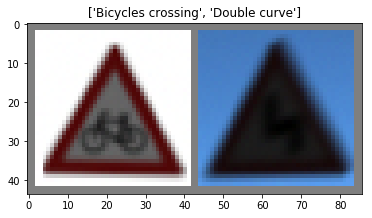

target images


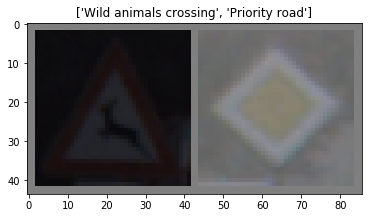

target images legacy


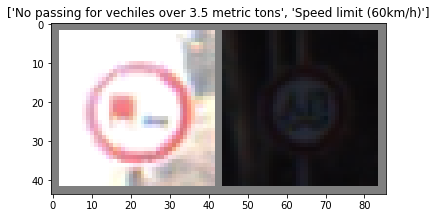

In [83]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datasets.synsigns import get_synsigns
from datasets.gtsrb import get_gtsrb
from datasets.gtsrb_legacy import get_gtsrb as get_gtsrb_legacy

# show input images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

classes = pd.read_csv('/home/wogong/datasets/gtsrb/signnames.csv')
class_names = {}
for i, row in classes.iterrows():
    class_names[str(row[0])] = row[1]

# Get a batch of training data
# inputs contains 4 images because batch_size=4 for the dataloaders
batch_size = 2
src_dataloader = get_synsigns('/home/wogong/datasets/synsigns', batch_size, True)
tgt_dataloader = get_gtsrb('/home/wogong/datasets/gtsrb', batch_size, True)
tgt_dataloader_legacy = get_gtsrb_legacy('/home/wogong/datasets/gtsrb', batch_size, True)

src_inputs, src_classes = next(iter(src_dataloader))
tgt_inputs, tgt_classes = next(iter(tgt_dataloader))
tgt_inputs_legacy, tgt_classes_legacy = next(iter(tgt_dataloader_legacy))

# Make a grid from batch
src_out = torchvision.utils.make_grid(src_inputs)
tgt_out = torchvision.utils.make_grid(tgt_inputs)
tgt_out_legacy = torchvision.utils.make_grid(tgt_inputs_legacy)

print ('source images')
imshow(src_out, title=[class_names[str(x.item())] for x in src_classes])
print ('target images')
imshow(tgt_out, title=[class_names[str(x.item())] for x in tgt_classes])
print ('target images legacy')
imshow(tgt_out_legacy, title=[class_names[str(x.item())] for x in tgt_classes_legacy])


In [77]:
import pprint, pickle

pkl_file = open('/home/wogong/datasets/gtsrb/gtsrb_train.p', 'rb')

data1 = pickle.load(pkl_file)
print (len(data1['labels']))

pkl_file.close()

39209


In [80]:
fs = {}
for k, v in {'a': 1, 'b': 2}.items():
    print (k, v)
    fs[k] = lambda x: x + v
fs['a'](1)

a 1
b 2


3